In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [6]:
y_train = y_train.reshape(-1,)
y_train[:5]


array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
y_test = y_test.reshape(-1,)

In [8]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [9]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

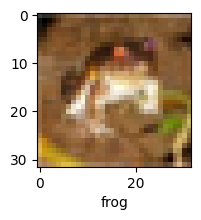

In [10]:
plot_sample(X_train, y_train, 0)

scaling the datasets

In [11]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [12]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

c:\Users\codea\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 56s 36ms/step - accuracy: 0.3050 - loss: 1.9252
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 36ms/step - accuracy: 0.4223 - loss: 1.6348
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 62s 40ms/step - accuracy: 0.4599 - loss: 1.5453
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 43ms/step - accuracy: 0.4749 - loss: 1.4895
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 73s 46ms/step - accuracy: 0.4962 - loss: 1.4318


In [13]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.62      0.45      0.52      1000
           1       0.67      0.44      0.53      1000
           2       0.28      0.62      0.39      1000
           3       0.45      0.19      0.27      1000
           4       0.56      0.21      0.31      1000
           5       0.57      0.20      0.29      1000
           6       0.47      0.61      0.53      1000
           7       0.40      0.71      0.51      1000
           8       0.83      0.28      0.42      1000
           9       0.39      0.72      0.51      1000

    accuracy                           0.44     10000
   macro avg       0.52      0.44      0.43     10000
weighted avg       0.52      0.44      0.43     10000



Training Model With CNN


In [18]:
cnn = models.Sequential([
    # cnn
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

c:\Users\codea\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [19]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 14ms/step - accuracy: 0.3878 - loss: 1.6715
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.6034 - loss: 1.1256
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 0.6616 - loss: 0.9765
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.6958 - loss: 0.8796
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.7232 - loss: 0.8064
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 21ms/step - accuracy: 0.7362 - loss: 0.7598
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.7590 - loss: 0.6935
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.7758 - loss: 0.6420
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.7916 - loss: 0.5974
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.8013 - loss: 0.5633


In [20]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7062 - loss: 0.8881


[0.9003915786743164, 0.7045999765396118]

In [21]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


array([[1.4734329e-02, 2.1303797e-03, 7.2450629e-03, 8.9687210e-01,
        4.2226943e-04, 2.0369781e-02, 1.3171334e-02, 1.5002416e-04,
        2.8158422e-03, 4.2088836e-02],
       [3.4654746e-04, 1.2018866e-02, 1.2690602e-06, 4.2800221e-07,
        1.0761863e-08, 1.2139091e-08, 6.8260164e-10, 1.0621521e-08,
        9.8700678e-01, 6.2616594e-04],
       [6.3553259e-02, 4.5429713e-01, 1.0996279e-02, 1.5598060e-02,
        5.3279828e-03, 6.3845824e-04, 6.4304186e-04, 6.1700755e-04,
        4.0990043e-01, 3.8428448e-02],
       [9.4757891e-01, 1.3693824e-04, 1.1755961e-02, 5.9721166e-05,
        1.3646175e-02, 1.2666770e-06, 2.8440825e-06, 7.2103640e-04,
        2.6081404e-02, 1.5752998e-05],
       [1.5148220e-06, 4.9153234e-05, 1.5450666e-02, 2.5587186e-01,
        2.2865438e-01, 6.4346083e-03, 4.9343035e-01, 4.3758089e-05,
        2.4036384e-05, 3.9765062e-05]], dtype=float32)

In [23]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 1, 0, 6]

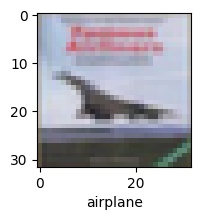

In [24]:
plot_sample(X_test, y_test,3)

In [25]:
classes[y_classes[3]]

'airplane'